## Classification (c)

In [17]:
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_c = {}
config_c['layer_specs'] = [3072, 64, 64, 10]
config_c['activation'] = 'tanh'
config_c['learning_rate'] = 0.4
config_c['batch_size'] = 256
config_c['epochs'] = 50  
config_c['early_stop'] = True 
config_c['early_stop_epoch'] = 10
config_c['L2_penalty'] = 0  
config_c['momentum'] = True  
config_c['momentum_gamma'] = 0.9  
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%

In [18]:
"""
Train your model here.
Implement batch SGD to train the model.
Implement Early Stopping.
Use config to set parameters for training like learning rate, momentum, etc.
"""
def train(model, x_train, y_train, x_valid, y_valid, config, patience=5):
    epochs = config_c['epochs']
    batch_size = config['batch_size']
    momentum =    config['momentum']
    momentum_gamma = config['momentum_gamma']
    L2_penalty = config['momentum_gamma']
    patience = config['early_stop_epoch']

    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []

    # How many times the validation loss has gone up in a row.
    cur_loss_up_sequence = 0

    for epoch in range(epochs):
        model.zero_grad()
        batch_loss = []
        batch_accuracy = []
        for x, y in generate_minibatches(x_train, y_train, batch_size):
            # Forward Pass
            train_y,loss = model.forward(x, y)
            batch_loss.append(loss) 
            # Backward Pass
            model.backward()
            model.updateweight() # update weight for each layer.
            batch_accuracy.append(model.accuracy(x,y))
    
        train_loss = np.mean(np.array(batch_loss))
        train_accuracy = np.mean(np.array(batch_accuracy))
        
        holdout_loss = model.forward(x_valid, y_valid)[1]
        holdout_accuracy = model.accuracy(x_valid, y_valid)

        train_loss_record.append(train_loss)
        train_accuracy_record.append(train_accuracy)

        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)

        print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy:.4f}, train_loss_norm:{train_loss:.4f}, '\
            f'valid_acc: {holdout_accuracy:.4f}, valid_loss_norm: {holdout_loss:.4f}')   


        # Save the best weights according to test set.
        if holdout_loss > max(holdout_loss_record):
            cur_loss_up_sequence += 1

            if cur_loss_up_sequence >= patience:
                model.save_load_weight(save=False)
                print("earlystop")
                break
        else:
            cur_loss_up_sequence = 0
            # Save the best weights.
            model.save_load_weight(save=True)
    
    return train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record

model_c  = Neuralnetwork(config_c)

# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)

train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train(model_c,x_train,y_train,x_valid,y_valid,config_c)

# Recall parameters with minimum validation loss
model_c.save_load_weight(save=False)
test_accuracy = test(model_c, x_test, y_test) 
print(test_accuracy)


(50000, 32, 32, 3)
inp: (50000, 32, 32, 3)
 epoch: 1, train accuracy: 0.0647, train_loss_norm:17.0694, valid_acc: 0.0674, valid_loss_norm: 17.1791
 epoch: 2, train accuracy: 0.0651, train_loss_norm:17.1330, valid_acc: 0.0688, valid_loss_norm: 17.1533
 epoch: 3, train accuracy: 0.0678, train_loss_norm:17.1721, valid_acc: 0.0644, valid_loss_norm: 17.2344
 epoch: 4, train accuracy: 0.0655, train_loss_norm:17.2125, valid_acc: 0.0646, valid_loss_norm: 17.2307
 epoch: 5, train accuracy: 0.0663, train_loss_norm:17.1979, valid_acc: 0.0648, valid_loss_norm: 17.2270
 epoch: 6, train accuracy: 0.0670, train_loss_norm:17.1858, valid_acc: 0.0676, valid_loss_norm: 17.1754
 epoch: 7, train accuracy: 0.0693, train_loss_norm:17.1454, valid_acc: 0.0680, valid_loss_norm: 17.1681
 epoch: 8, train accuracy: 0.0704, train_loss_norm:17.1226, valid_acc: 0.0694, valid_loss_norm: 17.1423
 epoch: 9, train accuracy: 0.0694, train_loss_norm:17.1426, valid_acc: 0.0662, valid_loss_norm: 17.2012
 epoch: 10, train acc

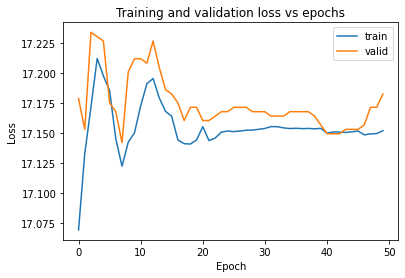

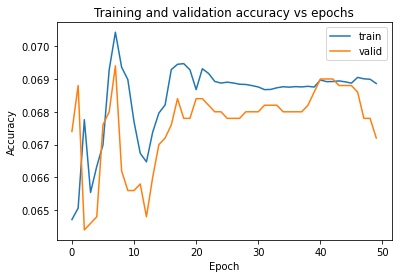

In [19]:


plt.figure(1)
plt.plot(np.arange(config_c['epochs']), train_loss_record, label='train')
plt.plot(np.arange(config_c['epochs']), holdout_loss_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(np.arange(config_c['epochs']), train_accuracy_record, label='train')
plt.plot(np.arange(config_c['epochs']), holdout_accuracy_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()